In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Medical Insurance Premium Prediction

## Load data

In [2]:
df = pd.read_csv("./data/Medicalpremium.csv")

## EDA

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
print(f"dataframe shape: {df.shape}")

dataframe shape: (986, 11)


<AxesSubplot:>

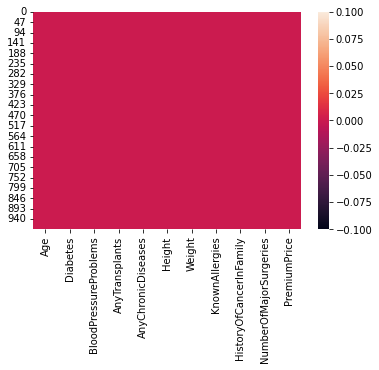

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [7]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

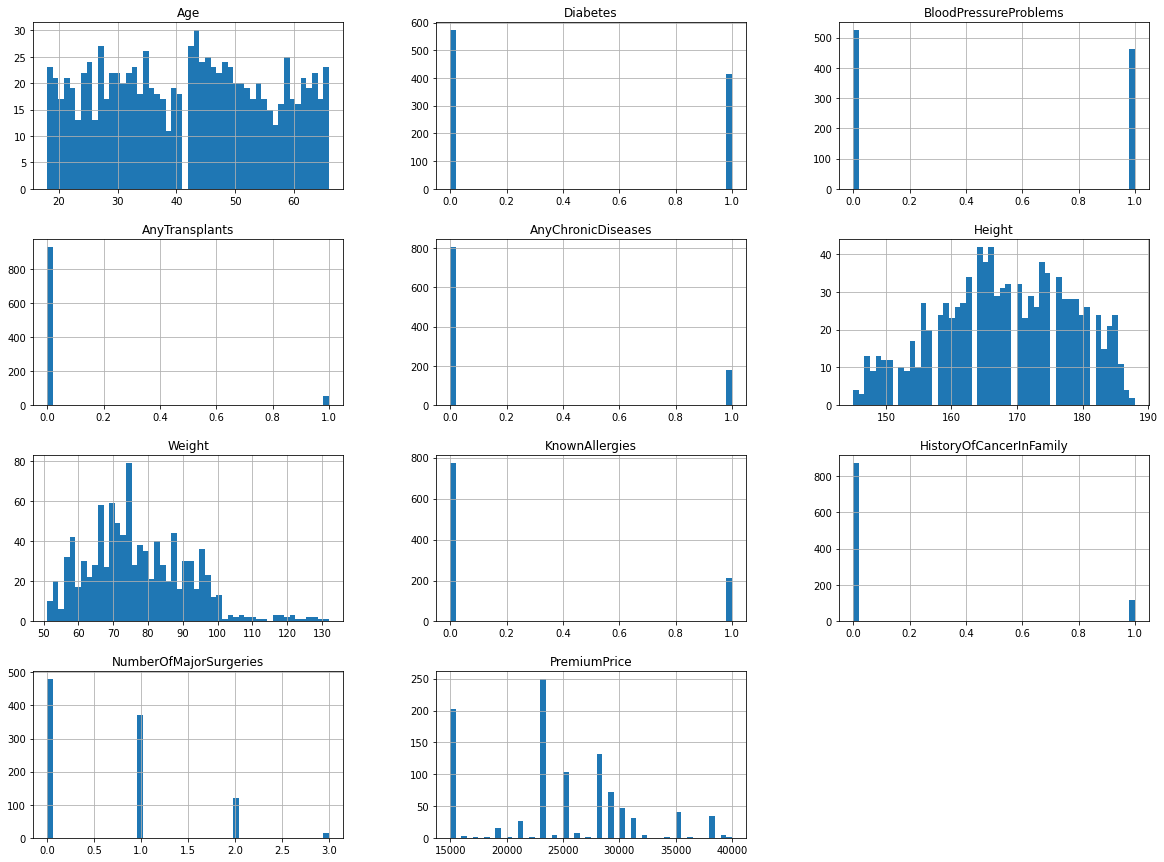

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='PremiumPrice'>

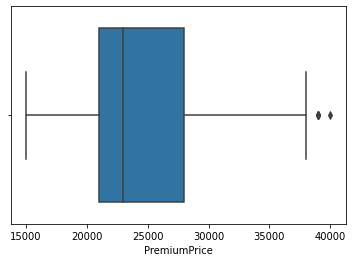

In [9]:
sns.boxplot(x='PremiumPrice',data=df)

<AxesSubplot:>

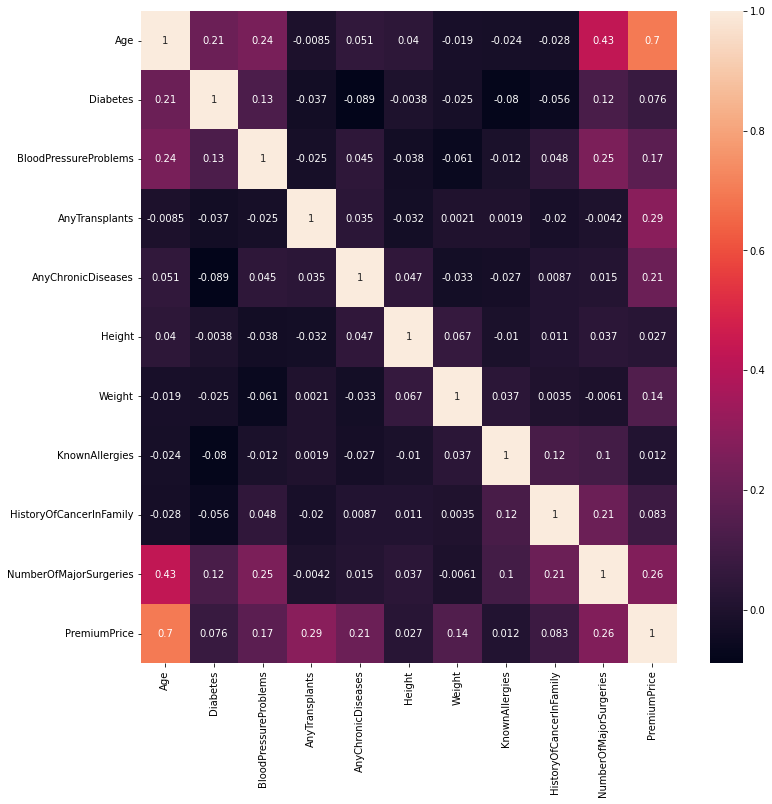

In [10]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

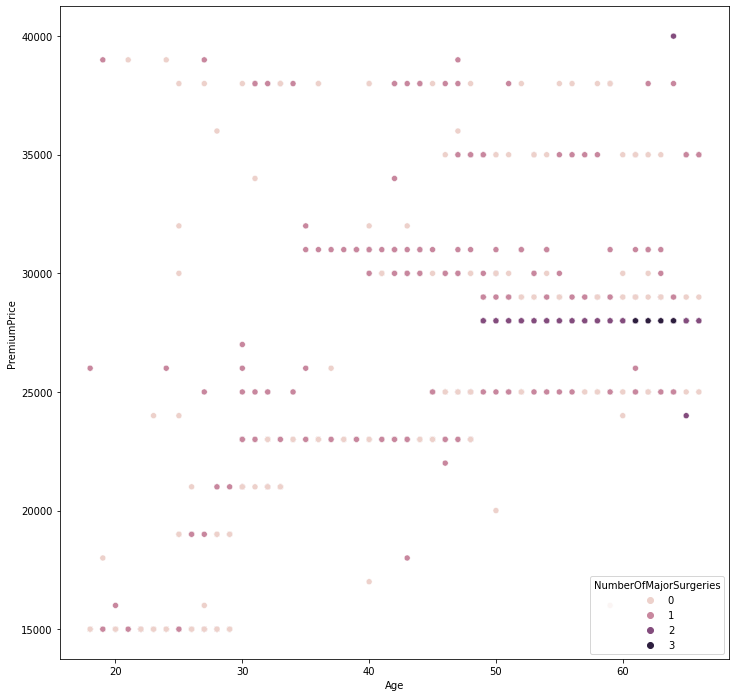

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='Age',y='PremiumPrice',hue='NumberOfMajorSurgeries',data=df)

## Model Search

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from catboost import CatBoostRegressor

In [12]:
X = df.drop('PremiumPrice', axis=1)
y = df.PremiumPrice.values

In [13]:
np.random.seed(42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
print('There are {} instances in the training set.'.format(len(y_train)))
print('There are {} instances in the test set.'.format(len(y_test)))

There are 788 instances in the training set.
There are 198 instances in the test set.


### Create Pipe

In [15]:
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('regressor', SGDRegressor())
])

### Run on un-optimised pipe

In [16]:
pipe.fit(X_train, y_train)
 
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.621794990797745
Test set score: 0.7120866944778883


## Pipe & Model Tuning

In [17]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
    'regressor': [SGDRegressor(), ElasticNet(), BayesianRidge(), SVR(), CatBoostRegressor()]
}

In [20]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=2,verbose=0).fit(X_train, y_train)
 
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Learning rate set to 0.03534
0:	learn: 5791.7393029	total: 576us	remaining: 575ms
1:	learn: 5696.4863979	total: 1.09ms	remaining: 545ms
2:	learn: 5580.7249221	total: 1.45ms	remaining: 483ms
3:	learn: 5480.5855552	total: 2ms	remaining: 498ms
4:	learn: 5375.8669815	total: 2.5ms	remaining: 497ms
5:	learn: 5287.1080626	total: 2.97ms	remaining: 492ms
6:	learn: 5195.7272825	total: 3.48ms	remaining: 494ms
7:	learn: 5106.4505421	total: 4ms	remaining: 496ms
8:	learn: 5016.9511895	total: 4.48ms	remaining: 493ms
9:	learn: 4938.2120442	total: 5.02ms	remaining: 497ms
10:	learn: 4861.2833868	total: 5.51ms	remaining: 495ms
11:	learn: 4792.0259077	total: 6.03ms	remaining: 496ms
12:	learn: 4720.5168025	total: 6.5ms	remaining: 494ms
13:	learn: 4645.4594224	total: 6.87ms	remaining: 484ms
14:	learn: 4578.4110176	total: 7.35ms	remaining: 483ms
15:	learn: 4519.4161787	total: 7.83ms	remaining: 482ms
16:	learn: 4454.3637665	total: 8.29ms	remaining: 480ms
17:	learn: 4400.7544556	total: 8.74ms	remaining: 477ms


In [21]:
best_params = grid.best_params_
print(best_params)

best_pipe = grid.best_estimator_
print(best_pipe)

{'regressor': <catboost.core.CatBoostRegressor object at 0x15904e7c0>, 'scaler': MaxAbsScaler(), 'selector__threshold': 0.01}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0.01)),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x1595bcb20>)])


In [22]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_regressor', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [25]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005478,0.000688,0.001654,0.000085,SGDRegressor(),StandardScaler(),0,"{'regressor': SGDRegressor(), 'scaler': Standa...",0.562104,0.548410,0.555257,0.006847,20
1,0.004583,0.000281,0.001537,0.000019,SGDRegressor(),StandardScaler(),0.001,"{'regressor': SGDRegressor(), 'scaler': Standa...",0.559661,0.547927,0.553794,0.005867,24
2,0.005047,0.000541,0.001482,0.000020,SGDRegressor(),StandardScaler(),0.01,"{'regressor': SGDRegressor(), 'scaler': Standa...",0.560749,0.550618,0.555683,0.005065,13
3,0.011275,0.000371,0.001811,0.000018,SGDRegressor(),MinMaxScaler(),0,"{'regressor': SGDRegressor(), 'scaler': MinMax...",0.556452,0.552711,0.554581,0.001870,22
4,0.011861,0.000547,0.001719,0.000086,SGDRegressor(),MinMaxScaler(),0.001,"{'regressor': SGDRegressor(), 'scaler': MinMax...",0.557894,0.552578,0.555236,0.002658,21


In [63]:
from sklearn.metrics import max_error, r2_score, mean_squared_error

In [61]:
pipe.fit(X_train,y_train)
predictions = pipe.predict(X_test)

max_error(y_test, predictions)

Learning rate set to 0.03943
0:	learn: 6027.1828286	total: 643us	remaining: 642ms
1:	learn: 5905.9783748	total: 1.19ms	remaining: 594ms
2:	learn: 5767.1671243	total: 1.76ms	remaining: 586ms
3:	learn: 5637.2193799	total: 2.38ms	remaining: 592ms
4:	learn: 5512.2451219	total: 3.07ms	remaining: 610ms
5:	learn: 5402.6751135	total: 3.61ms	remaining: 598ms
6:	learn: 5307.9537459	total: 4.24ms	remaining: 602ms
7:	learn: 5209.5789228	total: 4.84ms	remaining: 600ms
8:	learn: 5112.2865093	total: 5.72ms	remaining: 630ms
9:	learn: 5020.2312775	total: 6.27ms	remaining: 621ms
10:	learn: 4931.3779412	total: 7.06ms	remaining: 635ms
11:	learn: 4845.4884988	total: 7.73ms	remaining: 637ms
12:	learn: 4760.9721522	total: 8.33ms	remaining: 633ms
13:	learn: 4687.8815742	total: 9.02ms	remaining: 635ms
14:	learn: 4609.4238345	total: 9.59ms	remaining: 630ms
15:	learn: 4542.7961406	total: 10ms	remaining: 617ms
16:	learn: 4487.2298506	total: 10.6ms	remaining: 615ms
17:	learn: 4416.7969784	total: 11.2ms	remaining: 

12552.658252232344

In [62]:
r2_score(y_test, predictions)

0.8468879393714954

In [65]:
mean_squared_error(y_test, predictions,squared=False)

2555.2153892500946